In [2]:
pwd

'C:\\Users\\adamj\\Documents\\GitHub\\Springboard\\NLP Projects'

In [ ]:
#!pip install wordcloud

In [1]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
import en_core_web_sm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS

In [2]:
nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core', parse = True, tag=True, entity=True) (DJ'S code)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True) (DJ's code)
tokenizer = ToktokTokenizer()
##needed to use the comment out line below to get the stopwords
#nltk.download('stopwords') 
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [3]:
#function to remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#test the function with example
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [4]:
#function to expand contractions

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
#example
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [5]:
#function to remove special characters

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
#example
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [6]:
#function to find stem words
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
#example
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [7]:
#function for lemmatization
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
#example
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

In [8]:
#function to remove stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#example
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [9]:
#Bringing it all together — Building a Text Normalizer (comment out html stripping; not needed)
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        #if html_stripping:
        #    doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            print(doc)
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        #if text_lemmatization:
        #    doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [2]:
os.chdir('C:/Users/adamj/Documents/Github/Springboard/NLP Projects/CSV Files')

In [3]:
pwd

'C:\\Users\\adamj\\Documents\\Github\\Springboard\\NLP Projects\\CSV Files'

In [4]:
os.listdir()

['augmented.csv', 'Goodreads_preprocessed.csv', 'Goodreads_preprocessed2.csv']

In [5]:
goodreads=open('Goodreads_preprocessed.csv','r',encoding='utf8')
goodreads_csv=pd.read_csv(goodreads)

In [6]:
goodreads_csv['popular-shelves'][0:30]

0     young-adult fantasy library kindle series curr...
1     young-adult dystopian currently-reading dystop...
2     romance currently-reading young-adult favorite...
3     currently-reading mystery fiction favorites cr...
4     currently-reading kindle paranormal vampires y...
5     currently-reading fiction mystery book-club th...
6     to-read horror currently-reading favorites fic...
7     fantasy young-adult 2019-releases currently-re...
8     young-adult contemporary romance currently-rea...
9     currently-reading kindle to-buy thriller moder...
10    currently-reading romantic-suspense suspense c...
11    fiction horror crime fantasy currently-reading...
12    currently-reading biography non-fiction histor...
13    fantasy fiction classics favorites young-adult...
14    favorites fantasy currently-reading romance kr...
15    currently-reading young-adult ya books-i-own d...
16    currently-reading favorites fantasy young-adul...
17    currently-reading fantasy favorites mythol

In [7]:
pd.set_option('display.max_columns', None)
goodreads_csv.head(30)

,Unnamed: 0,title,author,author_url,rating,voters_count,url,into_movie,gender,hometown,books-num,born-at,works-count,publication-date,num-pages,popular-shelves,rating-dist,publisher,book-description,5 star votes,4 star votes,3 star votes,2 star votes,1 star votes,Total Votes,title_clean,book-series,book-num-in-series,% 5 star votes,% 4 star votes,% 3 star votes,% 2 star votes,% 1 star votes,title_pre-p,book-desc_pre-p,pop-shelves_pre-p,author_pre-p
0,0,"The Sword and The Prophet (Syren, #1)",Missy LaRae,https://www.goodreads.com/author/show/5805389....,3.80,50,https://goodreads.com/book/show/13575987-the-s...,0,female,"Portland, Oregon",2,12/17/1979,2,3/29/2012,150.0,young-adult fantasy library kindle series curr...,5:19|4:13|3:9|2:7|1:2|total:50,Pretty Wycked Designs,"“Why'd Mama hate us so much, Tyler?"" My head r...",19,13,9,7,2,50,The Sword and The Prophet,Syren,1,0.380000,0.260000,0.180000,0.140000,0.040000,sword prophet,whyd mama hate us much tyler head rested chest...,[young-adult fantasy library kindle series cur...,missy larae
1,1,"Ruins (Partials Sequence, #3)",Dan Wells,https://www.goodreads.com/author/show/2740668....,4.05,14673,https://goodreads.com/book/show/17607716-ruins,0,male,NaN,10,NaN,45,3/11/2014,464.0,young-adult dystopian currently-reading dystop...,5:5367|4:5621|3:2954|2:587|1:150|total:14679,Balzer + Bray,"Kira, Samm, and Marcus fight to prevent a fina...",5367,5621,2954,587,150,14679,Ruins,Partials Sequence,3,0.365624,0.382928,0.201240,0.039989,0.010219,ruins,kira samm marcus fight prevent final war parti...,[young-adult dystopian currently-reading dysto...,dan wells
2,2,"Breathe (Sea Breeze, #1)",Abbi Glines,https://www.goodreads.com/author/show/4872191....,3.86,77770,https://goodreads.com/book/show/11479285-breathe,0,female,"Birmingham, Alabama",10,NaN,88,5/16/2011,164.0,romance currently-reading young-adult favorite...,5:26825|4:24784|3:17639|2:5881|1:2655|total:77784,Wild Child Publishing,Sadie White's summer job isn't going to be on ...,26825,24784,17639,5881,2655,77784,Breathe,Sea Breeze,1,0.344865,0.318626,0.226769,0.075607,0.034133,breathe,sadie whites summer job not going beach life g...,[romance currently-reading young-adult favorit...,abbi glines
3,4,The Lock Artist,Steve Hamilton,https://www.goodreads.com/author/show/9891.Ste...,3.97,10967,https://goodreads.com/book/show/6811221-the-lo...,0,male,"Detroit, MI",10,NaN,35,NaN,NaN,currently-reading mystery fiction favorites cr...,5:3307|4:4786|3:2239|2:494|1:148|total:10974,NaN,"<i>""I was the Miracle Boy, once upon a time. L...",3307,4786,2239,494,148,10974,The Lock Artist,NaN,NaN,0.301349,0.436122,0.204028,0.045015,0.013486,lock artist,miracle boy upon time later milford mute golde...,[currently-reading mystery fiction favorites c...,steve hamilton
4,5,"Captivated (The Affliction Series, #1)",E.M. Jade,https://www.goodreads.com/author/show/4784370....,3.90,2818,https://goodreads.com/book/show/11082489-capti...,0,female,Phoenix,6,1/30/1986,6,12/1/2011,375.0,currently-reading kindle paranormal vampires y...,5:1072|4:834|3:590|2:203|1:119|total:2818,Eminent Books,“I stood close to the edge looking down at wha...,1072,834,590,203,119,2818,Captivated,The Affliction Series,1,0.380412,0.295955,0.209368,0.072037,0.042229,captivated,stood close edge looking thought death somehow...,[currently-reading kindle paranormal vampires ...,e jade
5,6,Turn of Mind,Alice LaPlante,https://www.goodreads.com/author/show/774591.A...,3.65,14028,https://goodreads.com/book/show/9639197-turn-o...,0,NaN,NaN,10,NaN,13,7/5/2011,320.0,currently-reading fiction mystery book-club th...,5:2571|4:5759|3:4230|2:1150|1:321|total:14031,Bond Street Books,"A stunning first novel, both literary and thri...",2571,5759,4230,1150,321,14031,Turn of Mind,NaN,NaN,0.183237,0.410448,0.301475,0.081961,0.022878,turn mind,stunning first novel literary thriller retired...,[currently-reading fiction mystery book club t...,alice laplante
6,7,Let the Right One In,John Ajvide Lindqvist,https://www.

In [8]:
goodreads_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27846 entries, 0 to 27845
Data columns (total 37 columns):
Unnamed: 0            27846 non-null int64
title                 27846 non-null object
author                27846 non-null object
author_url            27846 non-null object
rating                27846 non-null float64
voters_count          27846 non-null int64
url                   27846 non-null object
into_movie            27846 non-null int64
gender                23049 non-null object
hometown              14698 non-null object
books-num             27846 non-null int64
born-at               7786 non-null object
works-count           27846 non-null int64
publication-date      22732 non-null object
num-pages             24149 non-null float64
popular-shelves       27846 non-null object
rating-dist           27846 non-null object
publisher             23499 non-null object
book-description      27846 non-null object
5 star votes          27846 non-null int64
4 star votes    

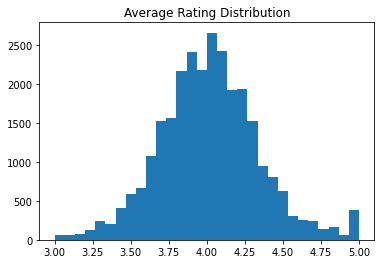

count    27846.000000
mean         4.008796
std          0.344242
min          0.000000
25%          3.800000
50%          4.000000
75%          4.210000
max          5.000000
Name: rating, dtype: float64


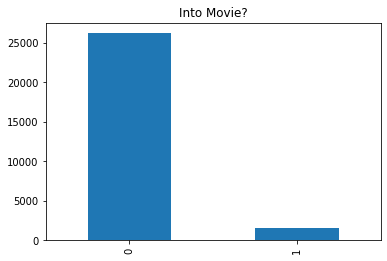

0    26211
1     1635
Name: into_movie, dtype: int64


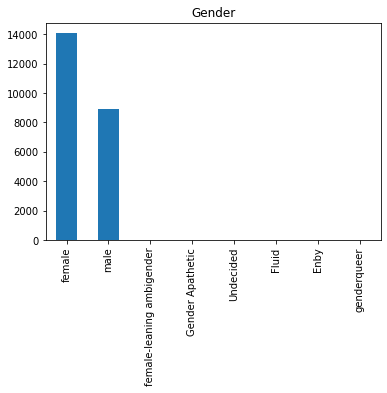

female                       14092
male                          8944
female-leaning ambigender        6
Gender Apathetic                 3
Undecided                        1
Fluid                            1
Enby                             1
genderqueer                      1
Name: gender, dtype: int64


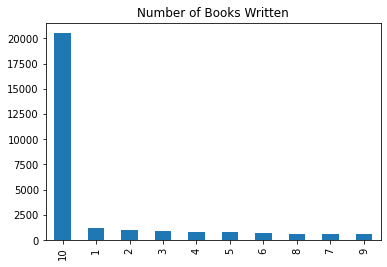

10    20517
1      1170
2      1008
3       932
4       856
5       766
6       755
8       652
7       605
9       585
Name: books-num, dtype: int64


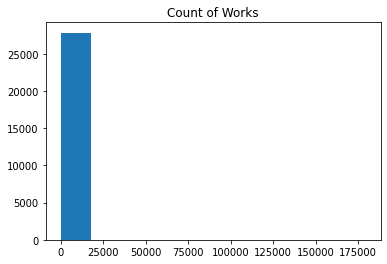

count     27846.000000
mean        214.574589
std        4273.582876
min           0.000000
25%           9.000000
50%          28.000000
75%          82.000000
max      179320.000000
Name: works-count, dtype: float64


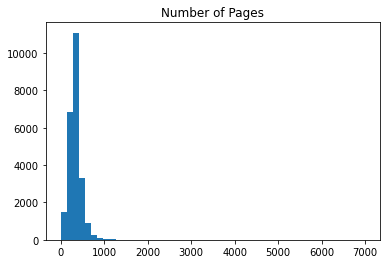

count    24149.000000
mean       334.481718
std        168.094157
min          0.000000
25%        246.000000
50%        320.000000
75%        397.000000
max       7000.000000
Name: num-pages, dtype: float64


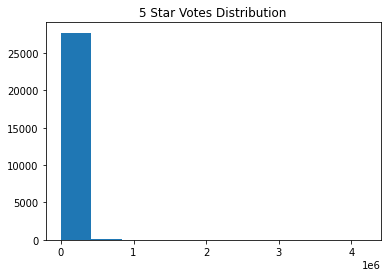

count    2.784600e+04
mean     1.190517e+04
std      8.058425e+04
min      0.000000e+00
25%      5.500000e+01
50%      7.385000e+02
75%      4.357750e+03
max      4.191995e+06
Name: 5 star votes, dtype: float64


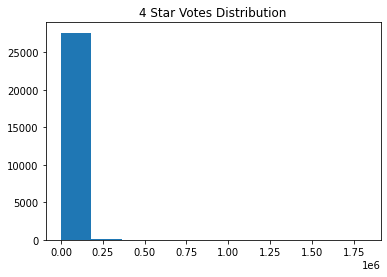

count    2.784600e+04
mean     9.471860e+03
std      4.843917e+04
min      0.000000e+00
25%      4.600000e+01
50%      7.595000e+02
75%      4.276000e+03
max      1.819922e+06
Name: 4 star votes, dtype: float64


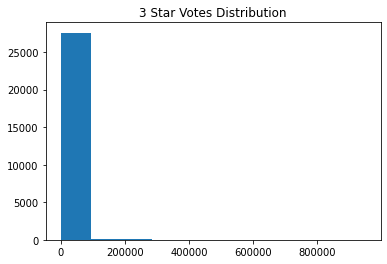

count     27846.000000
mean       5232.040293
std       25594.599048
min           0.000000
25%          28.000000
50%         469.000000
75%        2523.000000
max      950620.000000
Name: 3 star votes, dtype: float64


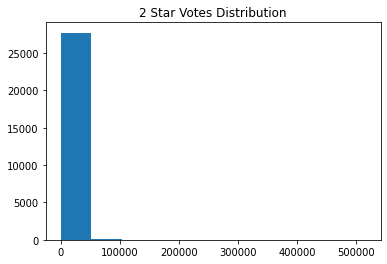

count     27846.000000
mean       1433.520613
std        8539.251450
min           0.000000
25%           9.000000
50%         112.000000
75%         598.000000
max      515352.000000
Name: 2 star votes, dtype: float64


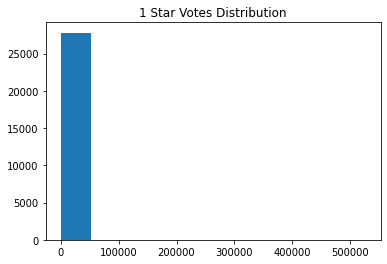

count     27846.000000
mean        644.218164
std        6027.705760
min           0.000000
25%           4.000000
50%          37.000000
75%         193.000000
max      526473.000000
Name: 1 star votes, dtype: float64


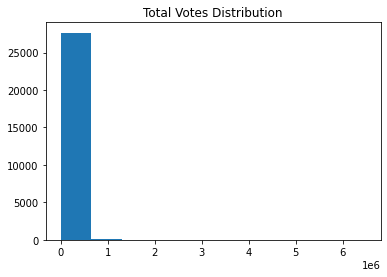

count    2.784600e+04
mean     2.868681e+04
std      1.617160e+05
min      0.000000e+00
25%      1.520000e+02
50%      2.234000e+03
75%      1.237350e+04
max      6.480598e+06
Name: Total Votes, dtype: float64


In [10]:
#histogram and summary of rating
plt.hist(goodreads_csv['rating'],bins=30,range=[3, 5])
plt.title('Average Rating Distribution')
plt.show()
print(goodreads_csv['rating'].describe())

#bar chart of into movie
goodreads_csv['into_movie'].value_counts().plot(kind='bar')
plt.title('Into Movie?')
plt.show()
print(goodreads_csv['into_movie'].value_counts())

#bar chart of 'gender'
goodreads_csv['gender'].value_counts().plot(kind='bar')
plt.title('Gender')
plt.show()
print(goodreads_csv['gender'].value_counts())

#bar chart of 'books-num'
goodreads_csv['books-num'].value_counts().plot(kind='bar')
plt.title('Number of Books Written')
plt.show()
print(goodreads_csv['books-num'].value_counts())

#histogram and summary of works-count
plt.hist(goodreads_csv['works-count'])
plt.title('Count of Works')
plt.show()
print(goodreads_csv['works-count'].describe())

#histogram and summary of num-pages
plt.hist(goodreads_csv['num-pages'],bins=50)
plt.title('Number of Pages')
plt.show()
print(goodreads_csv['num-pages'].describe())

#histogram and summary of 5 star rating
plt.hist(goodreads_csv['5 star votes'])
plt.title('5 Star Votes Distribution')
plt.show()
print(goodreads_csv['5 star votes'].describe())

#histogram and summary of 4 star rating
plt.hist(goodreads_csv['4 star votes'])
plt.title('4 Star Votes Distribution')
plt.show()
print(goodreads_csv['4 star votes'].describe())

#histogram and summary of 3 star rating
plt.hist(goodreads_csv['3 star votes'])
plt.title('3 Star Votes Distribution')
plt.show()
print(goodreads_csv['3 star votes'].describe())

#histogram and summary of 2 star rating
plt.hist(goodreads_csv['2 star votes'])
plt.title('2 Star Votes Distribution')
plt.show()
print(goodreads_csv['2 star votes'].describe())

#histogram and summary of 1 star rating
plt.hist(goodreads_csv['1 star votes'])
plt.title('1 Star Votes Distribution')
plt.show()
print(goodreads_csv['1 star votes'].describe())

#histogram and summary of total votes
plt.hist(goodreads_csv['Total Votes'])
plt.title('Total Votes Distribution')
plt.show()
print(goodreads_csv['Total Votes'].describe())

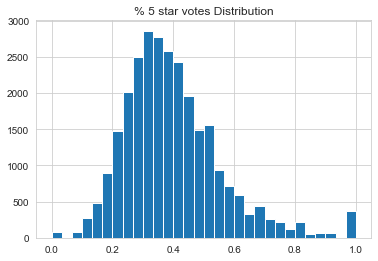

count    2.784600e+04
mean     1.190517e+04
std      8.058425e+04
min      0.000000e+00
25%      5.500000e+01
50%      7.385000e+02
75%      4.357750e+03
max      4.191995e+06
Name: 5 star votes, dtype: float64


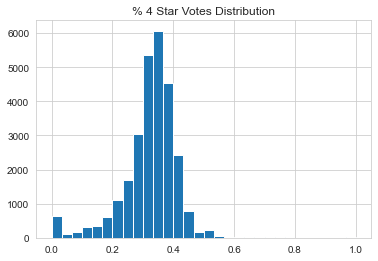

count    2.784600e+04
mean     9.471860e+03
std      4.843917e+04
min      0.000000e+00
25%      4.600000e+01
50%      7.595000e+02
75%      4.276000e+03
max      1.819922e+06
Name: 4 star votes, dtype: float64


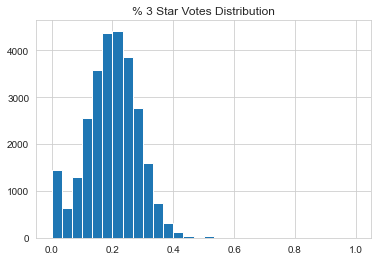

count     27846.000000
mean       5232.040293
std       25594.599048
min           0.000000
25%          28.000000
50%         469.000000
75%        2523.000000
max      950620.000000
Name: 3 star votes, dtype: float64


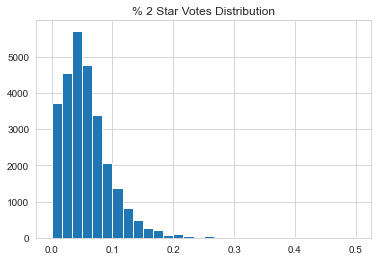

count     27846.000000
mean       1433.520613
std        8539.251450
min           0.000000
25%           9.000000
50%         112.000000
75%         598.000000
max      515352.000000
Name: 2 star votes, dtype: float64


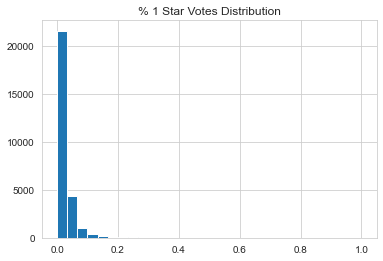

count     27846.000000
mean        644.218164
std        6027.705760
min           0.000000
25%           4.000000
50%          37.000000
75%         193.000000
max      526473.000000
Name: 1 star votes, dtype: float64


In [38]:
#histogram and summary of 5 star rating
plt.hist(goodreads_csv['% 5 star votes'],bins=30)
plt.title('% 5 star votes Distribution')
plt.show()
print(goodreads_csv['5 star votes'].describe())

#histogram and summary of 4 star rating
plt.hist(goodreads_csv['% 4 star votes'],bins=30)
plt.title('% 4 Star Votes Distribution')
plt.show()
print(goodreads_csv['4 star votes'].describe())

#histogram and summary of 3 star rating
plt.hist(goodreads_csv['% 3 star votes'],bins=30)
plt.title('% 3 Star Votes Distribution')
plt.show()
print(goodreads_csv['3 star votes'].describe())

#histogram and summary of 2 star rating
plt.hist(goodreads_csv['% 2 star votes'],bins=30)
plt.title('% 2 Star Votes Distribution')
plt.show()
print(goodreads_csv['2 star votes'].describe())

#histogram and summary of 1 star rating
plt.hist(goodreads_csv['% 1 star votes'],bins=30)
plt.title('% 1 Star Votes Distribution')
plt.show()
print(goodreads_csv['1 star votes'].describe())

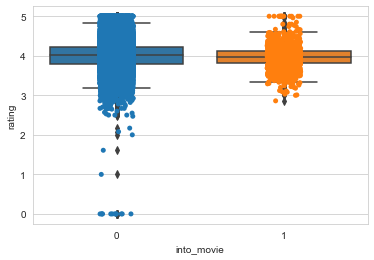

In [39]:
#replicate the above but in comparison to ratings
# Boxplot with Seaborn
#boxplot of into movie
sns.set_style('whitegrid')
ax = sns.boxplot(x='into_movie',y='rating',data=goodreads_csv)
ax = sns.stripplot(x="into_movie", y="rating",data=goodreads_csv)

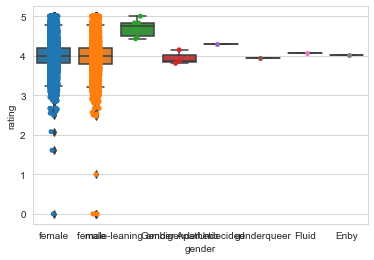

In [40]:
#boxplot of gender
sns.set_style('whitegrid')
ax = sns.boxplot(x='gender',y='rating',data=goodreads_csv)
ax = sns.stripplot(x="gender", y="rating",data=goodreads_csv)


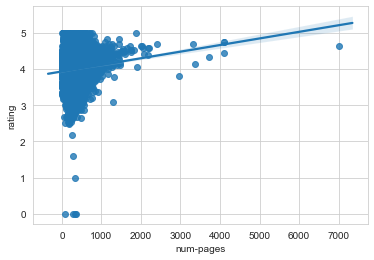

In [41]:
#scatterplot of num-pages
sns.regplot(x=goodreads_csv["num-pages"], 
            y=goodreads_csv["rating"])

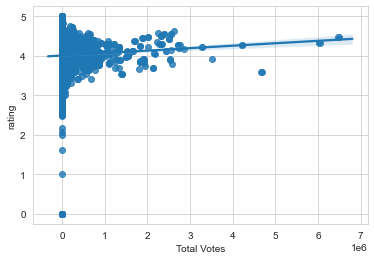

In [42]:
#scatterplot of total votes
sns.regplot(x=goodreads_csv["Total Votes"], 
            y=goodreads_csv["rating"])

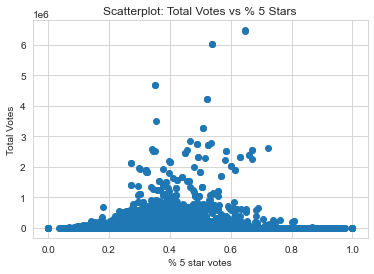

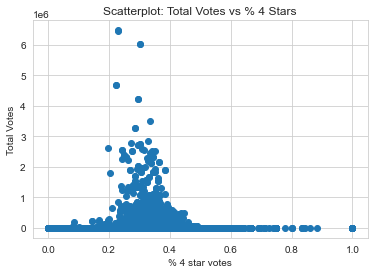

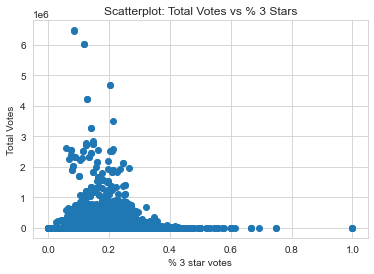

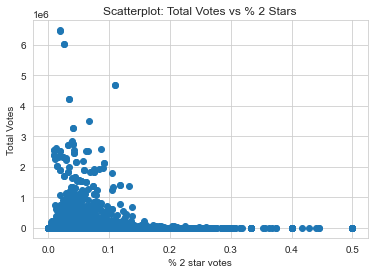

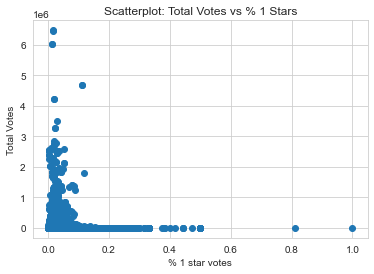

In [43]:
#is there a correlation between % 5,4,...,1 star votes and total votes?
#scatterplot
plt.scatter(goodreads_csv['% 5 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("% 5 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs % 5 Stars")
plt.show()

#scatterplot
plt.scatter(goodreads_csv['% 4 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("% 4 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs % 4 Stars")
plt.show()

#scatterplot
plt.scatter(goodreads_csv['% 3 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("% 3 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs % 3 Stars")
plt.show()

#scatterplot
plt.scatter(goodreads_csv['% 2 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("% 2 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs % 2 Stars")
plt.show()

#scatterplot
plt.scatter(goodreads_csv['% 1 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("% 1 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs % 1 Stars")
plt.show()


In [44]:
goodreads_csv['book-desc_pre-p'].head(30)

0     whyd mama hate us much tyler head rested chest...
1     kira samm marcus fight prevent final war parti...
2     sadie whites summer job not going beach life g...
3     miracle boy upon time later milford mute golde...
4     stood close edge looking thought death somehow...
5     stunning first novel literary thriller retired...
6     autumn inconceivable comes blackeberg suburb s...
7     anches stones daggers bones  locked beast away...
8     gia montgomerys boyfriend adley dumps parking ...
9     novel ideas book year  top ten goodreads listo...
10    behind public facade blackthorne inc high end ...
11    b bad language scatalogical humour razor wit c...
12    nelson mandela one great moral political leade...
13    edition lewiss classic fantasy fiction package...
14    circe quinn goes sleep home wakes corral fille...
15    truth justice no longer black white issues   s...
16    b hazel stands crossroads b remaining crew arg...
17    magnus chase seen share trouble ever since

In [45]:
#make a new column where gender is just binary

#value counts for gender
goodreads_csv['gender'].value_counts()

female                       14092
male                          8944
female-leaning ambigender        6
Gender Apathetic                 3
Fluid                            1
Undecided                        1
genderqueer                      1
Enby                             1
Name: gender, dtype: int64

In [46]:
#make non-female and non-male missing
goodreads_csv['gender_mf']=goodreads_csv['gender']
goodreads_csv['gender_mf']=goodreads_csv['gender'].replace(["female-leaning ambigender",
                                                            "Gender Apathetic",
                                                            "Fluid",
                                                            "Undecided",
                                                            "genderqueer",
                                                            "Enby"], np.nan)

In [47]:
goodreads_csv['gender_mf'].value_counts()

female    14092
male       8944
Name: gender_mf, dtype: int64

In [48]:
# export to csv
goodreads_csv.to_csv("Goodreads_preprocessed2.csv",index=False)

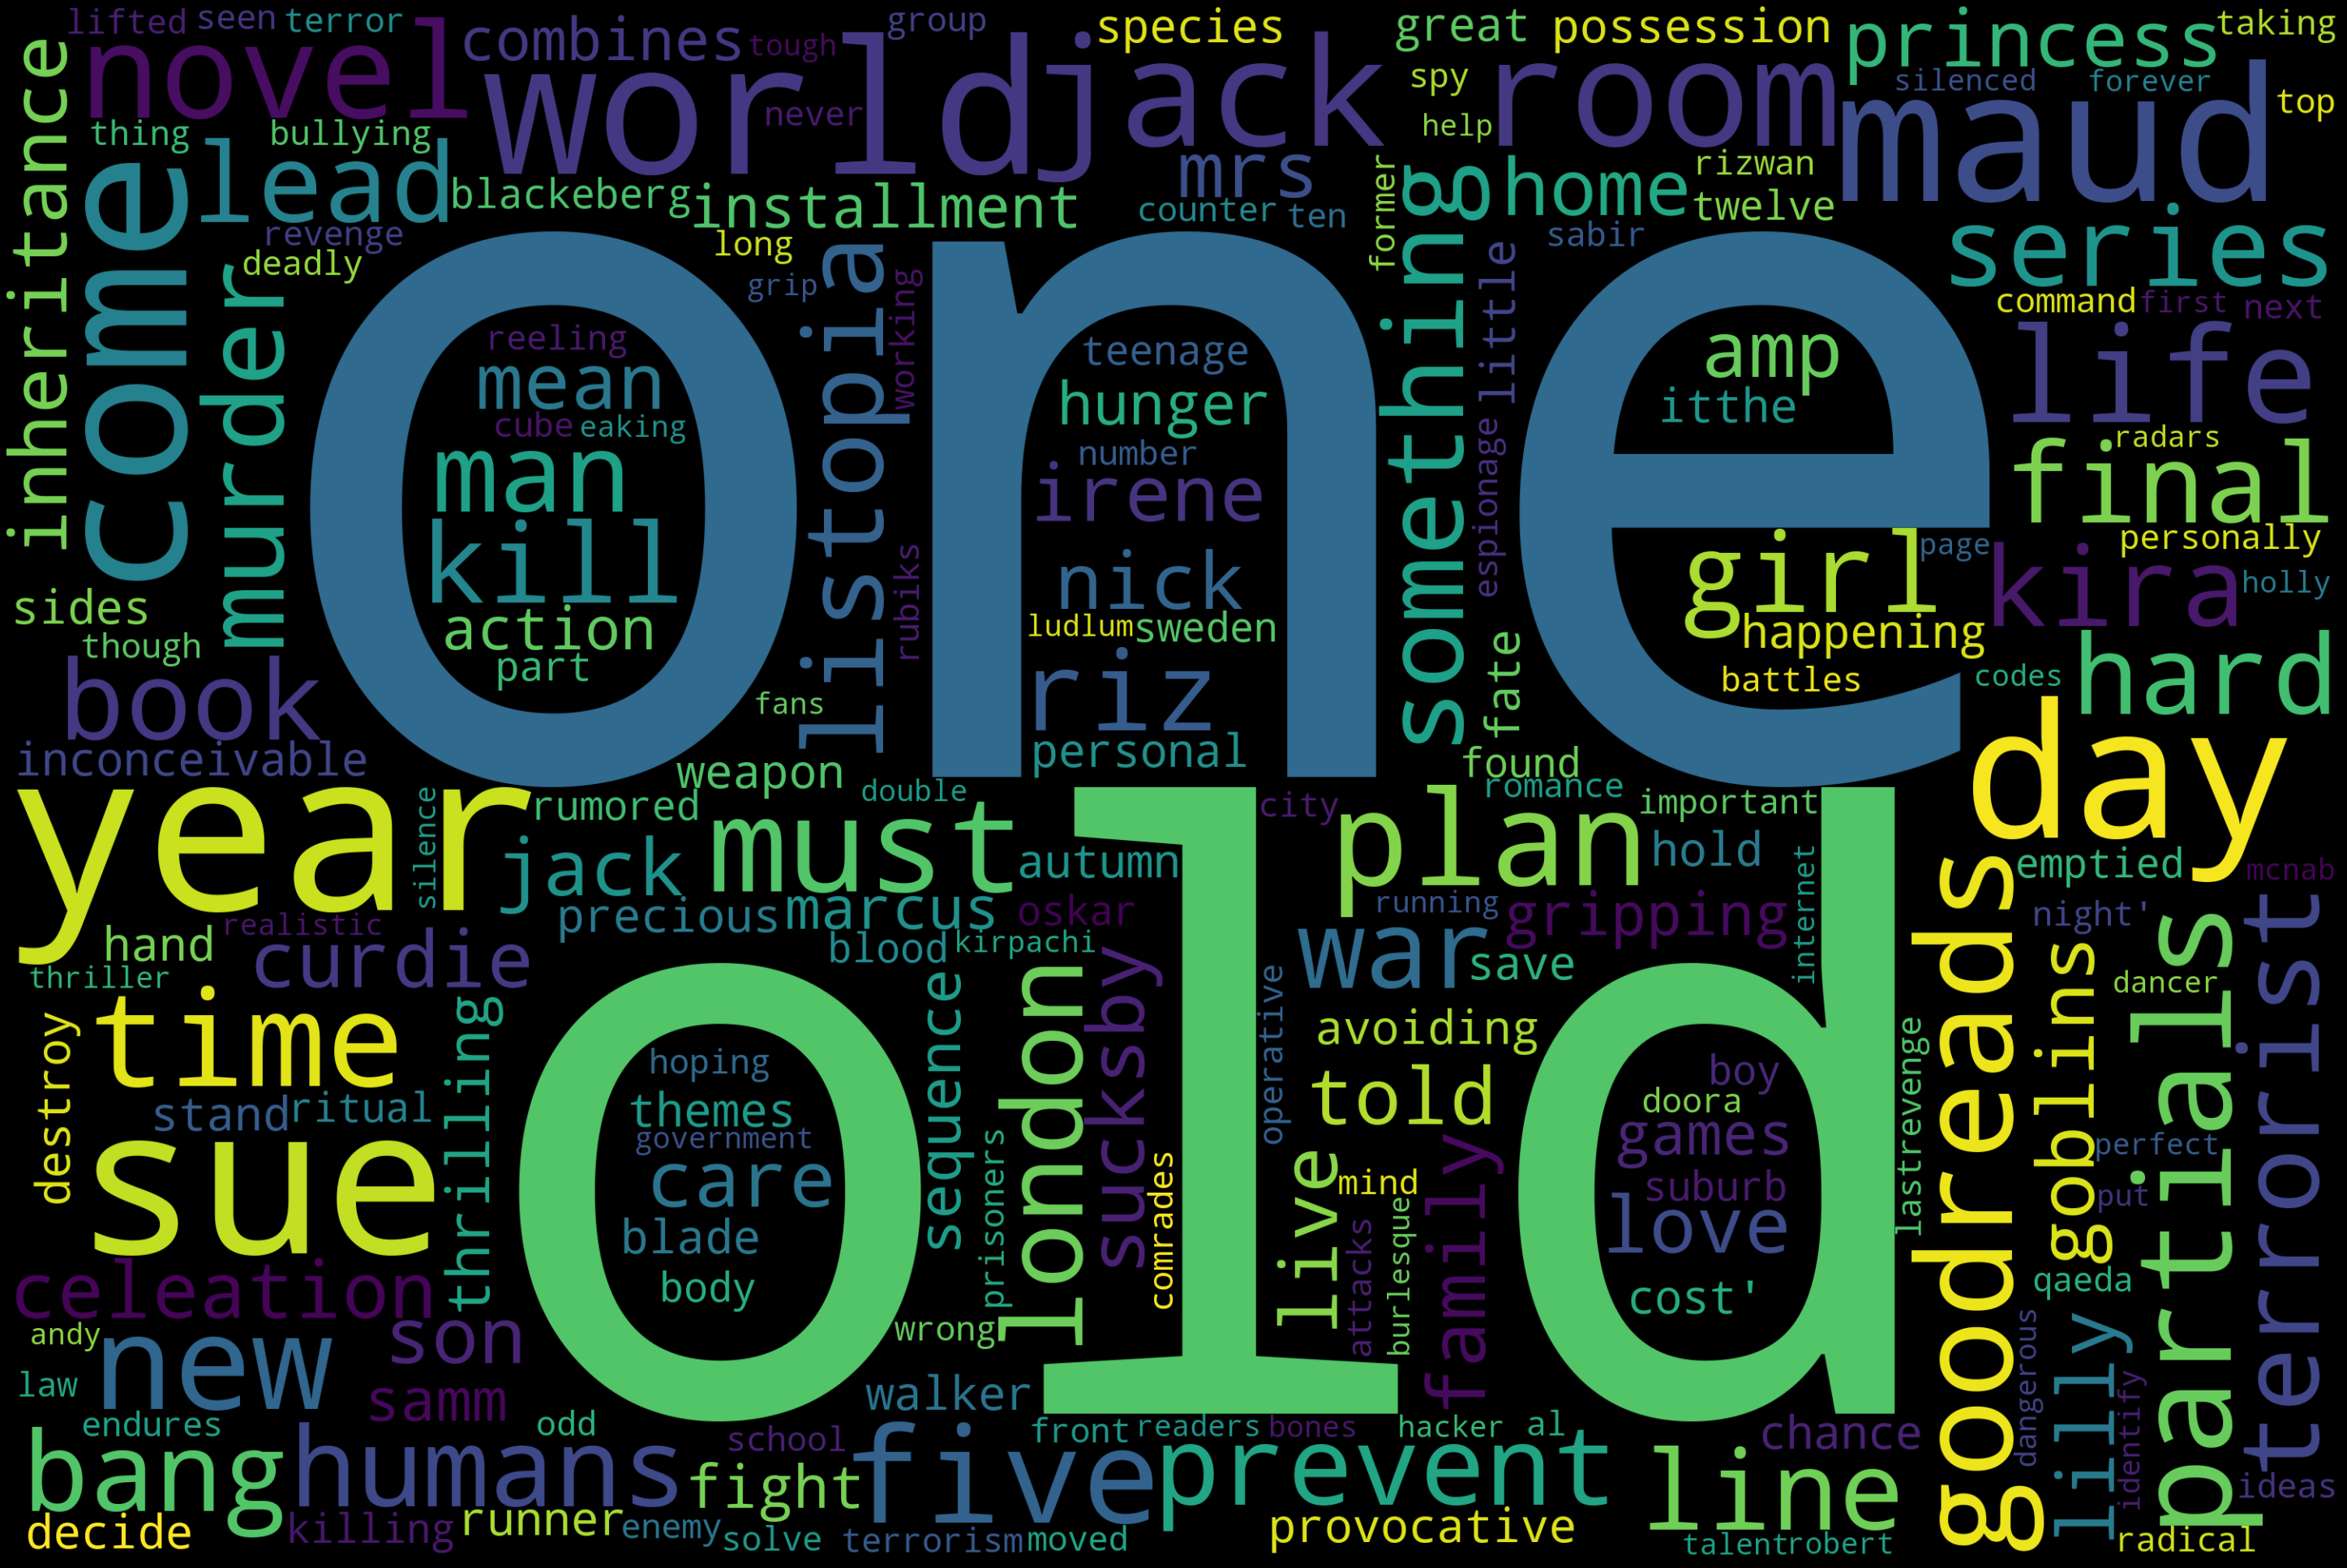

In [11]:
goodreads_best=goodreads_csv[goodreads_csv.rating >= 4]
text = goodreads_best['book-desc_pre-p'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
goodreads_best=goodreads_csv[goodreads_csv.rating < 4]
text = goodreads_best['book-desc_pre-p'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
goodreads_csv['popular-shelves'].head(30)

In [ ]:
goodreads_best=goodreads_csv[goodreads_csv.rating >= 4]
text = goodreads_best['popular-shelves'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
goodreads_best=goodreads_csv[goodreads_csv.rating < 4]
text = goodreads_best['popular-shelves'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()